In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the dataset 
df = pd.read_csv(r'..\data\Student_performance_data .csv')


## Understanding the Data

In [2]:
# basic info 
print("Columns:", df.columns) # displays the column names
print("Information:") 
print(df.info()) #displays dataset information         
print("Summary Statistics (Numerical):")
print(df.describe().T)# displays stats for numeric columns
print("Missing Values:", df.isnull().sum().sum())

Columns: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int

## Exploratory Data Analysis

Univariate Analysis

In [3]:
# define the numerical and categorical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'
]

In [4]:
# fefine mappings for categorical variables
gender_map = {0: 'Male', 1: 'Female'}
ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_map = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher Study'}
tutoring_map = {0: 'No', 1: 'Yes'}
parental_support_map = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_map = {0: 'No', 1: 'Yes'}
sports_map = {0: 'No', 1: 'Yes'}
music_map = {0: 'No', 1: 'Yes'}
volunteering_map = {0: 'No', 1: 'Yes'}
grade_class_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}

# apply mappings 
df['Gender'] = df['Gender'].map(gender_map)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)
df['ParentalEducation'] = df['ParentalEducation'].map(parental_education_map)
df['Tutoring'] = df['Tutoring'].map(tutoring_map)
df['ParentalSupport'] = df['ParentalSupport'].map(parental_support_map)
df['Extracurricular'] = df['Extracurricular'].map(extracurricular_map)
df['Sports'] = df['Sports'].map(sports_map)
df['Music'] = df['Music'].map(music_map)
df['Volunteering'] = df['Volunteering'].map(volunteering_map)
df['GradeClass'] = df['GradeClass'].map(grade_class_map)

parental_education_order = ['None', 'High School', 'Some College', "Bachelor's", 'Higher Study']
parental_support_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
grade_class_order = ['A', 'B', 'C', 'D', 'F']

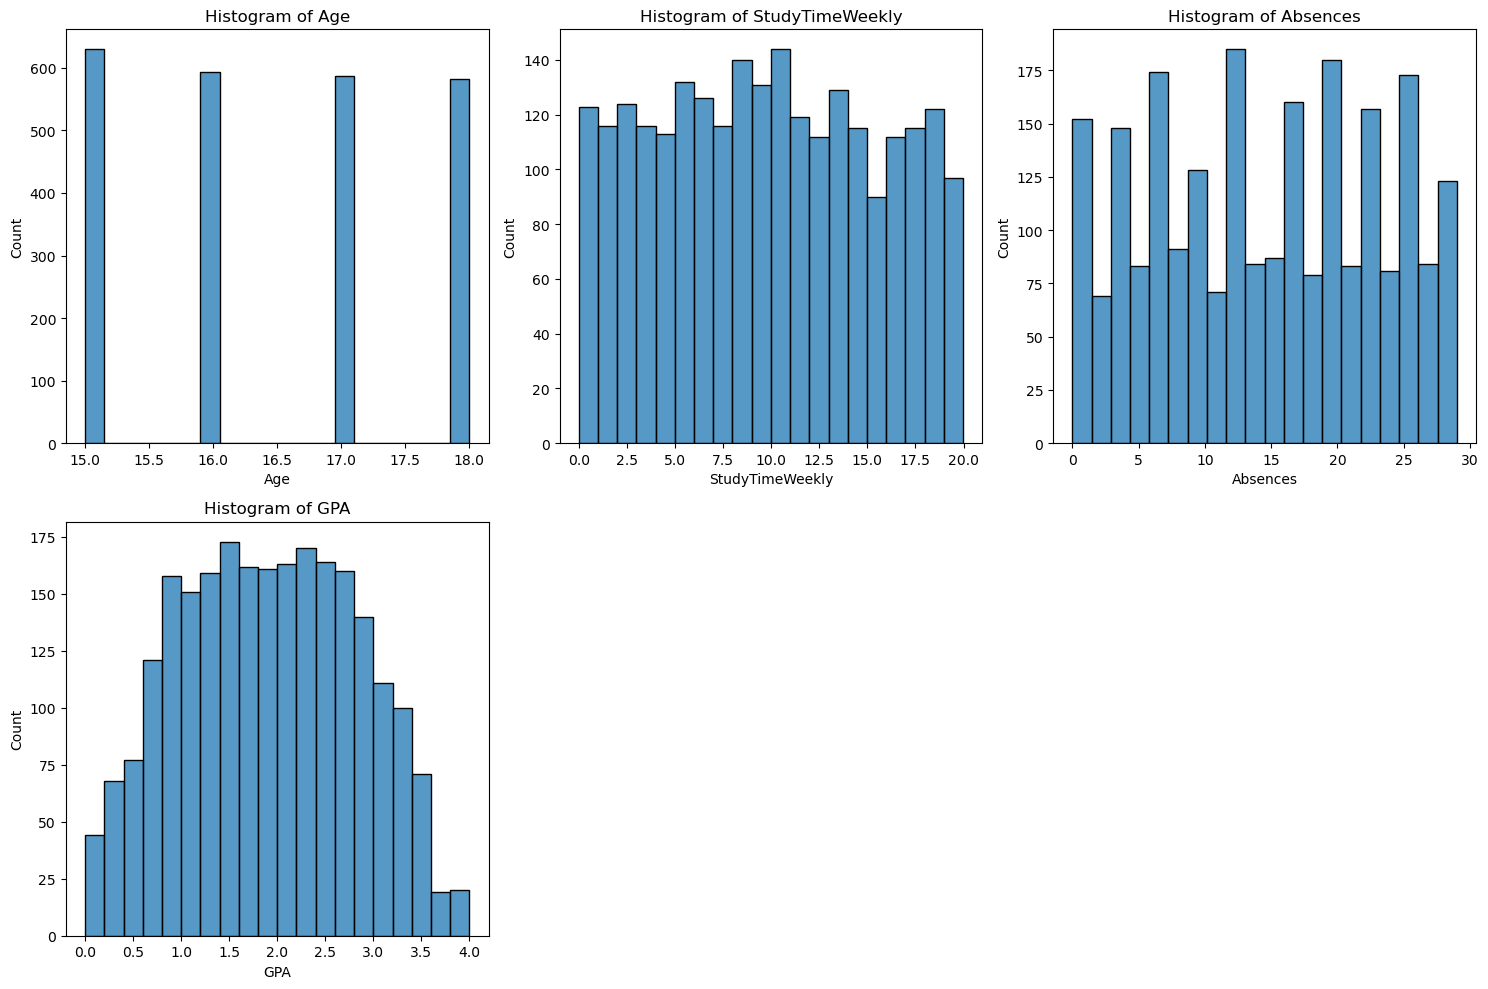

In [5]:
#numerical
n_cols = 3
n_rows_num = (len(numerical_features) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows_num, n_cols, figsize=(15, 5 * n_rows_num))
axes = axes.flatten()

# histograms for numerical features
for idx, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
# removes empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
# plt.savefig('numerical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

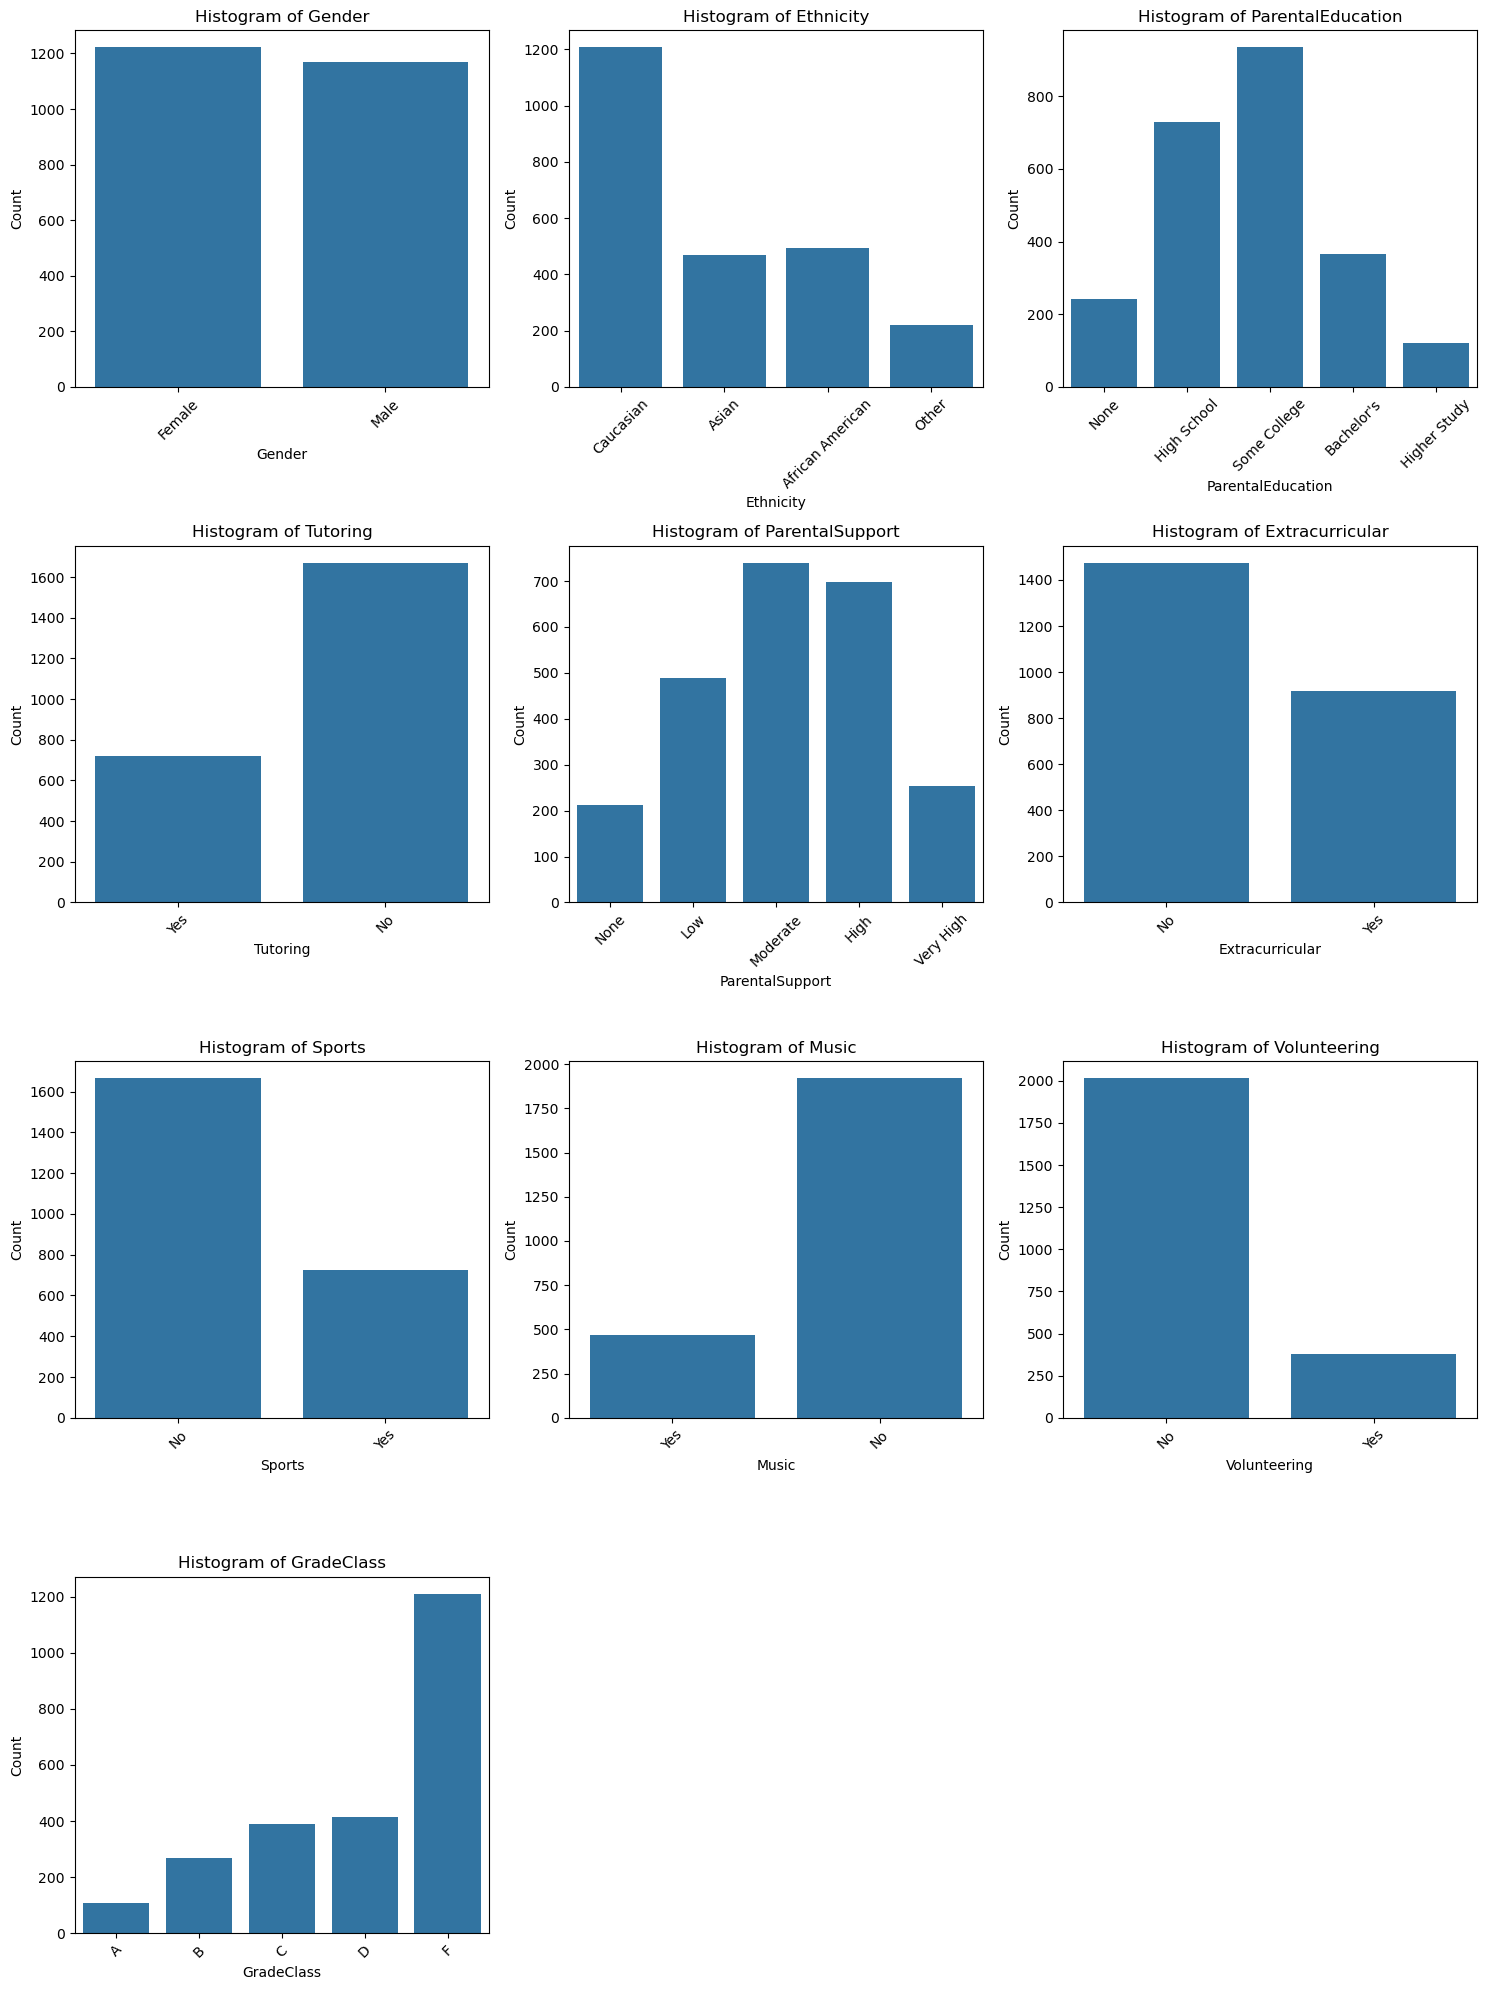

In [6]:
#categorical
n_rows_cat = (len(categorical_features) + n_cols - 1) // n_cols  # Ceiling division: 10 / 3 = 4 rows
fig, axes = plt.subplots(n_rows_cat, n_cols, figsize=(15, 5 * n_rows_cat))
axes = axes.flatten()

# count plots for categorical features
for idx, feature in enumerate(categorical_features):
    if feature == 'ParentalEducation': # set the order for specific features
        order = parental_education_order
    elif feature == 'ParentalSupport':
        order = parental_support_order
    elif feature == 'GradeClass':
        order = grade_class_order
    else:
        order = None  # Default order for other features

    sns.countplot(x=feature, data=df, ax=axes[idx], order=order)
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and save
plt.tight_layout()
# plt.savefig('categorical_histograms.png', dpi=300, bbox_inches='tight') # saves pic used for report
plt.show()
plt.close()

Bivariate Analysis

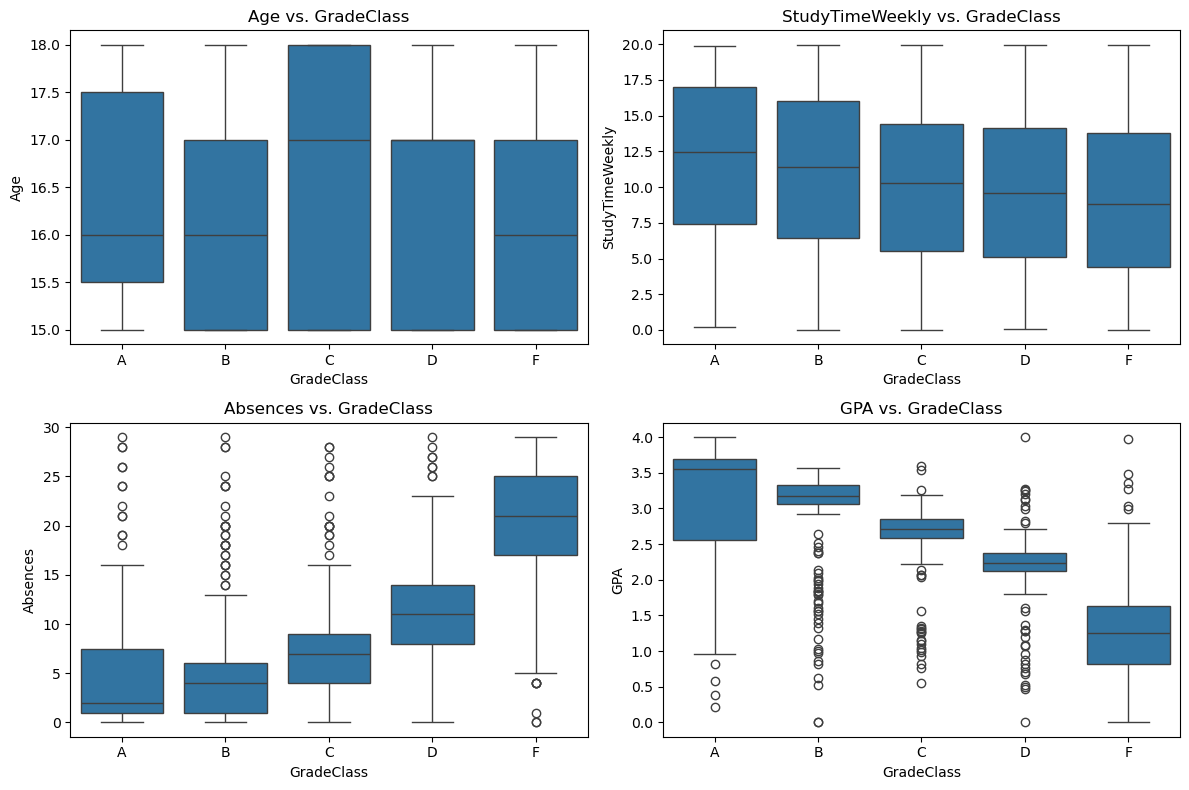

In [7]:
#numerical 
#displays boxplots comparing the gradclass to the other features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='GradeClass', y=feature, data=df, ax=axes[idx], order=grade_class_order)
    axes[idx].set_title(f'{feature} vs. GradeClass')
    axes[idx].set_xlabel('GradeClass')
    axes[idx].set_ylabel(feature)
plt.tight_layout()
plt.show()
plt.close()

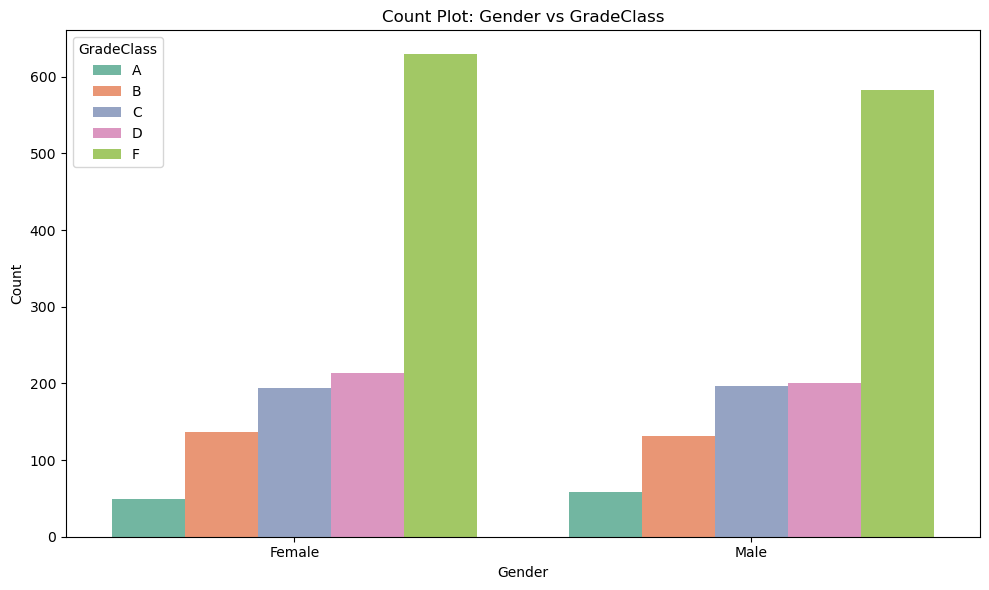

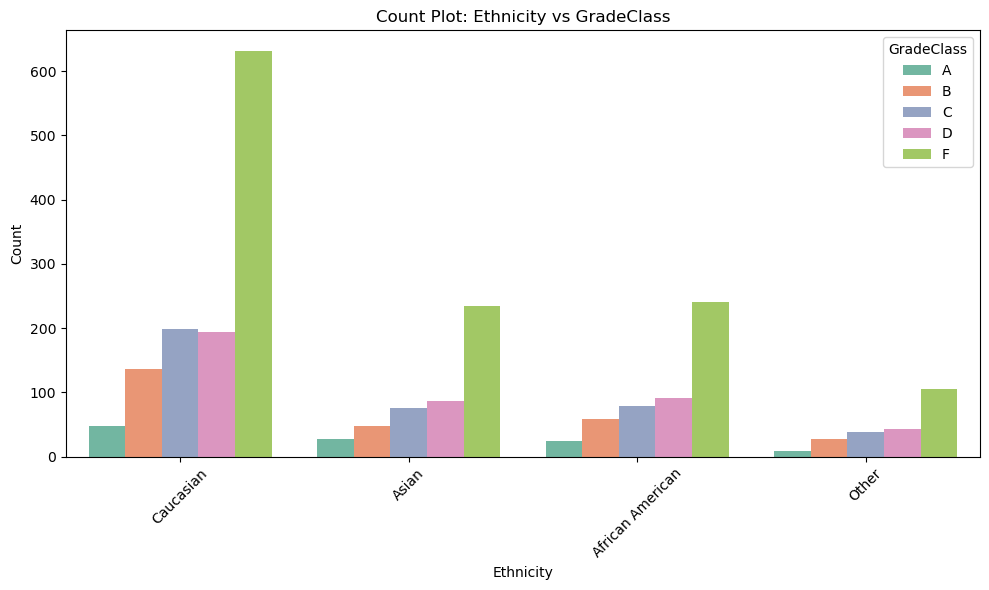

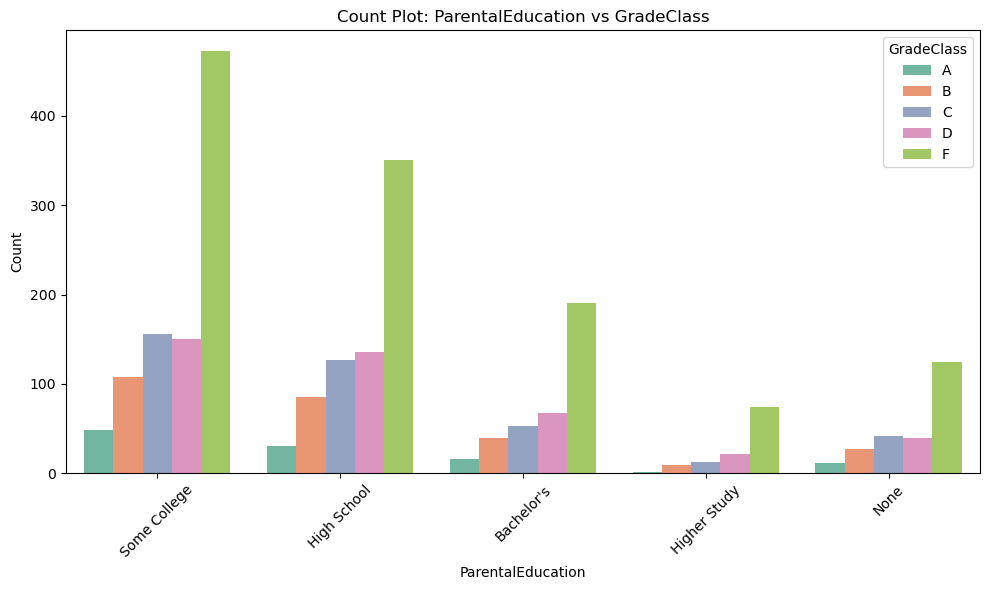

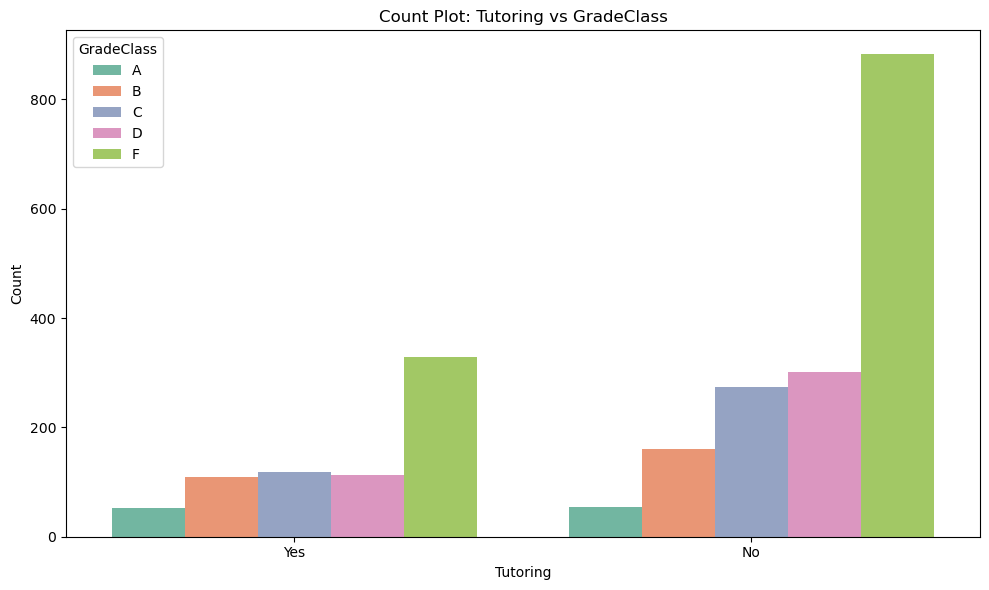

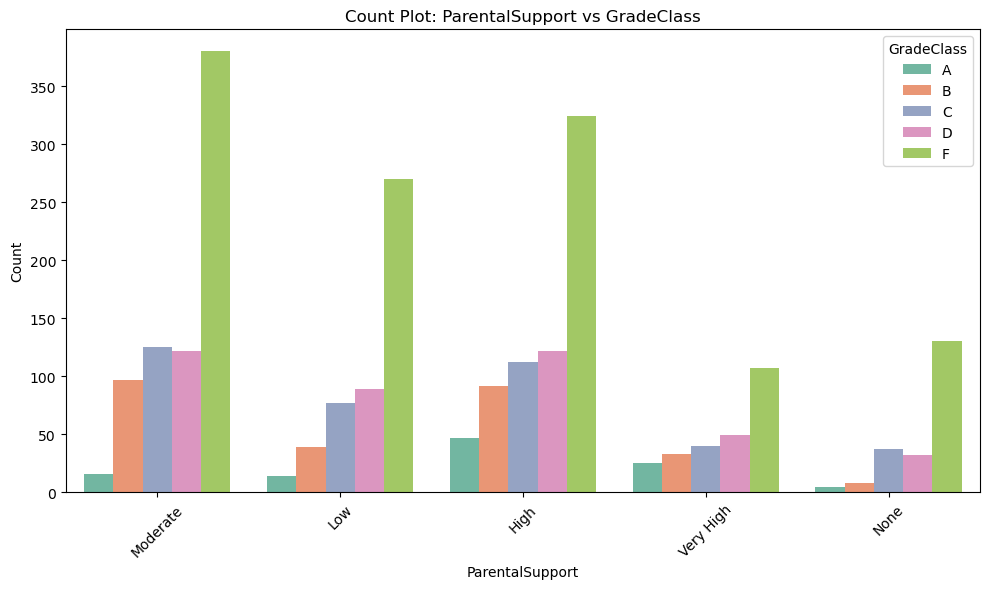

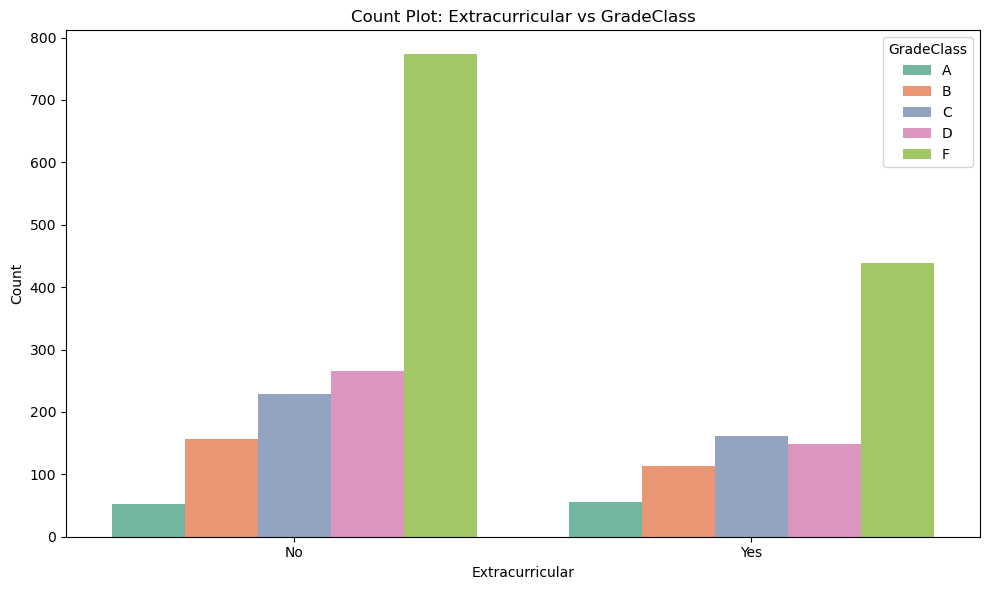

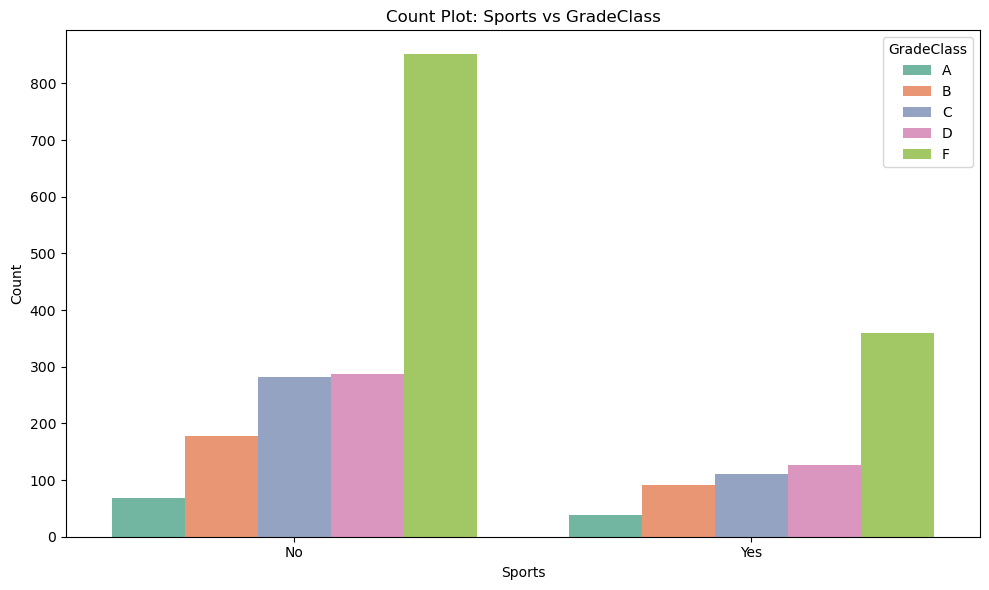

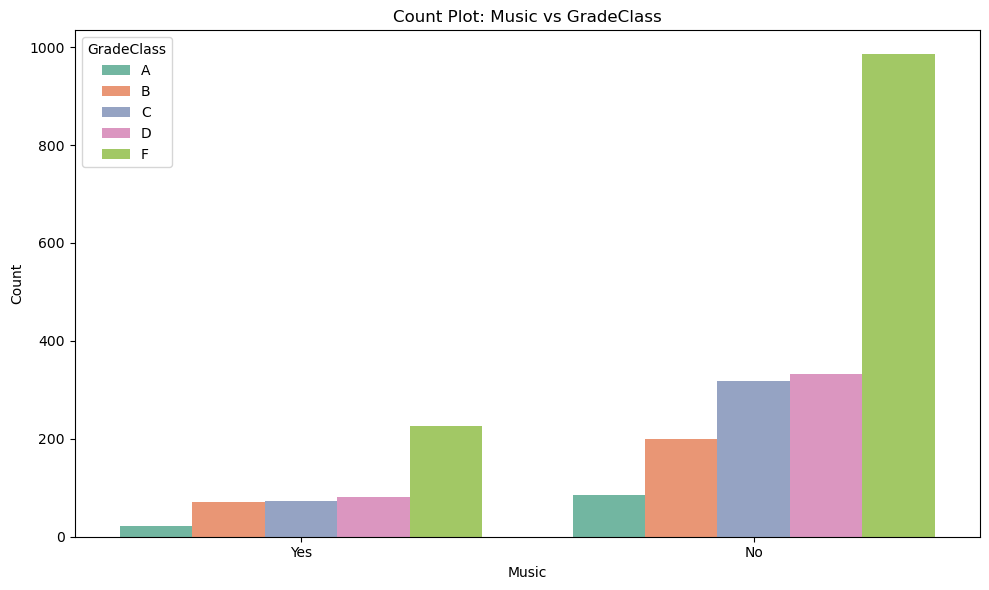

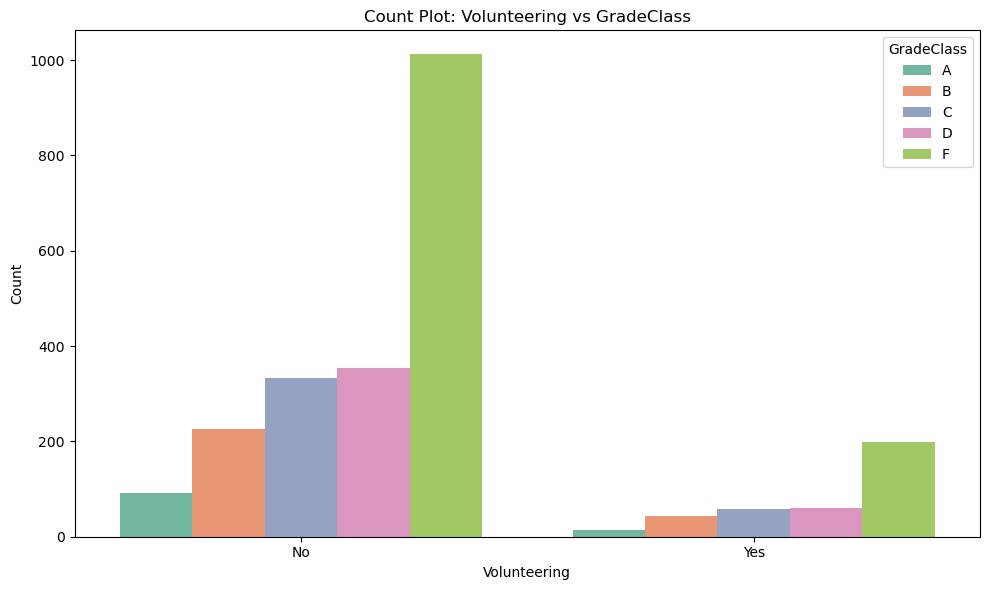

In [8]:
#catagorical
categorical_features = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
    'Extracurricular', 'Sports', 'Music', 'Volunteering'
]
# display count plots 
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='GradeClass', data=df, hue_order=grade_class_order, palette='Set2')
    plt.title(f'Count Plot: {feature} vs GradeClass')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='GradeClass')
    if feature in ['Ethnicity', 'ParentalEducation', 'ParentalSupport']:
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()